In [28]:
#objectives

#load the dataset into pandas dataframe
#conduct a thorough data inspection to identify the structure,missing values,datatypes
#clean the dataset
#remove duplicates record
#replace erroneous values with NaN
#handle missing data appropriately by either dropping or filling values based on logical reasoning
#perform an exploratory data analysis by generating descriptive statistics
#visualizing the distribution of numeric variables using histograms, and creating a correlation heatmap to examine the relationships between soil and environmental variables. 
#identify which variables most influence fertilizer recommendations
#determine the crop type with the highest average soil moisture
#suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C
#export your clean dataset as cleaned_precision_agriculture_data.csv and document your insights and recommendations based on the analysis.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv('climate_action_data.csv')
df.info

<bound method DataFrame.info of     Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   
..        ...         ...              ...     ...            ...         ...   
908  SEN-1090  2025-04-01            18.37    7.03           21.0        47.1   
909  SEN-1201  2025-07-21            15.89     6.4           30.5        33.3   
910  SEN-1309  2025-11-06            28.96    5.04           20.5        47.6   
911  SEN-1339  2025-12-06            16.85    6.57           19.3        34.5   
912  SEN-1050  2025-02-20            77.87    4.73           18.6        46.2

In [31]:
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [32]:
df.dtypes

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [33]:
df.shape

(913, 10)

In [34]:
cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                   'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce')
print(df.to_string())

    Sensor_ID        Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm) Drone_Image_ID
0    SEN-1000  2025-01-01             36.22     6.98            21.3         50.4  Tomatoes                           67.6                        26.6       IMG-2000
1    SEN-1001  2025-01-02             76.55     5.03            23.5         34.3     Wheat                          130.4                         8.3       IMG-2001
2    SEN-1002  2025-01-03             61.24     6.52            21.9         54.6  Tomatoes                           36.0                        29.4       IMG-2002
3    SEN-1003  2025-01-04             51.91     6.62            24.0         48.7     Maize                           85.8                        19.6       IMG-2003
4    SEN-1004  2025-01-05             20.92     5.98            19.2         70.6     Wheat                           75.6                        29.9       IMG-2004
5   

In [35]:
cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
                   'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce')
print(df.dtypes)

Sensor_ID                         object
Date                              object
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Crop_Type                         object
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
Drone_Image_ID                    object
dtype: object


In [36]:

print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


In [37]:
df = df.drop_duplicates()
print(f"Data shape after removing duplicates: {df.shape}")

Data shape after removing duplicates: (802, 10)


In [38]:
# Replace negative values and out-of-range values in numeric columns with NaN
for col in cols:
    if 'Soil_Moisture' in col:
        df.loc[(df[col] < 0) | (df[col] > 100), col] = pd.NA
    elif 'Soil_pH' in col:
        df.loc[(df[col] < 0) | (df[col] > 14), col] = pd.NA
    elif 'Temperature' in col:
        df.loc[(df[col] < -50) | (df[col] > 60), col] = pd.NA
    elif 'Humidity' in col:
        df.loc[(df[col] < 0) | (df[col] > 100), col] = pd.NA
    elif 'Fertilizer_Recommended' in col or 'Irrigation_Recommended' in col:
        df.loc[df[col] < 0, col] = pd.NA

In [39]:
# Handle missing data
# Drop rows where essential identifiers or crop type are missing
# For numeric columns, fill missing values with column median (robust to outliers)
df = df.dropna(subset=['Sensor_ID', 'Crop_Type'])

for col in cols:
    df[col] = df[col].fillna(df[col].median())


df['Date'] = df['Date'].fillna(df['Date'].mode()[0])# For 'Date', fill missing with a placeholder or mode (most common date)

print(df.isnull().sum())

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [ ]:
# Generate descriptive statistics for numeric columns
eda_stats = df[cols].describe()
print(eda_stats)

       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        798.000000  798.000000      798.000000   798.000000   
mean          44.717368    6.243509       26.454511    59.996992   
std           20.452038    1.020957        4.855973    17.414296   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.947500    5.322500       22.300000    45.925000   
50%           45.370000    6.240000       26.600000    59.600000   
75%           62.555000    7.080000       30.575000    75.175000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     798.000000                  798.000000  
mean                       87.332832                   17.410777  
std                        34.798429                    7.149949  
min                        30.000000                    5.000000  
25%                        57.825000                

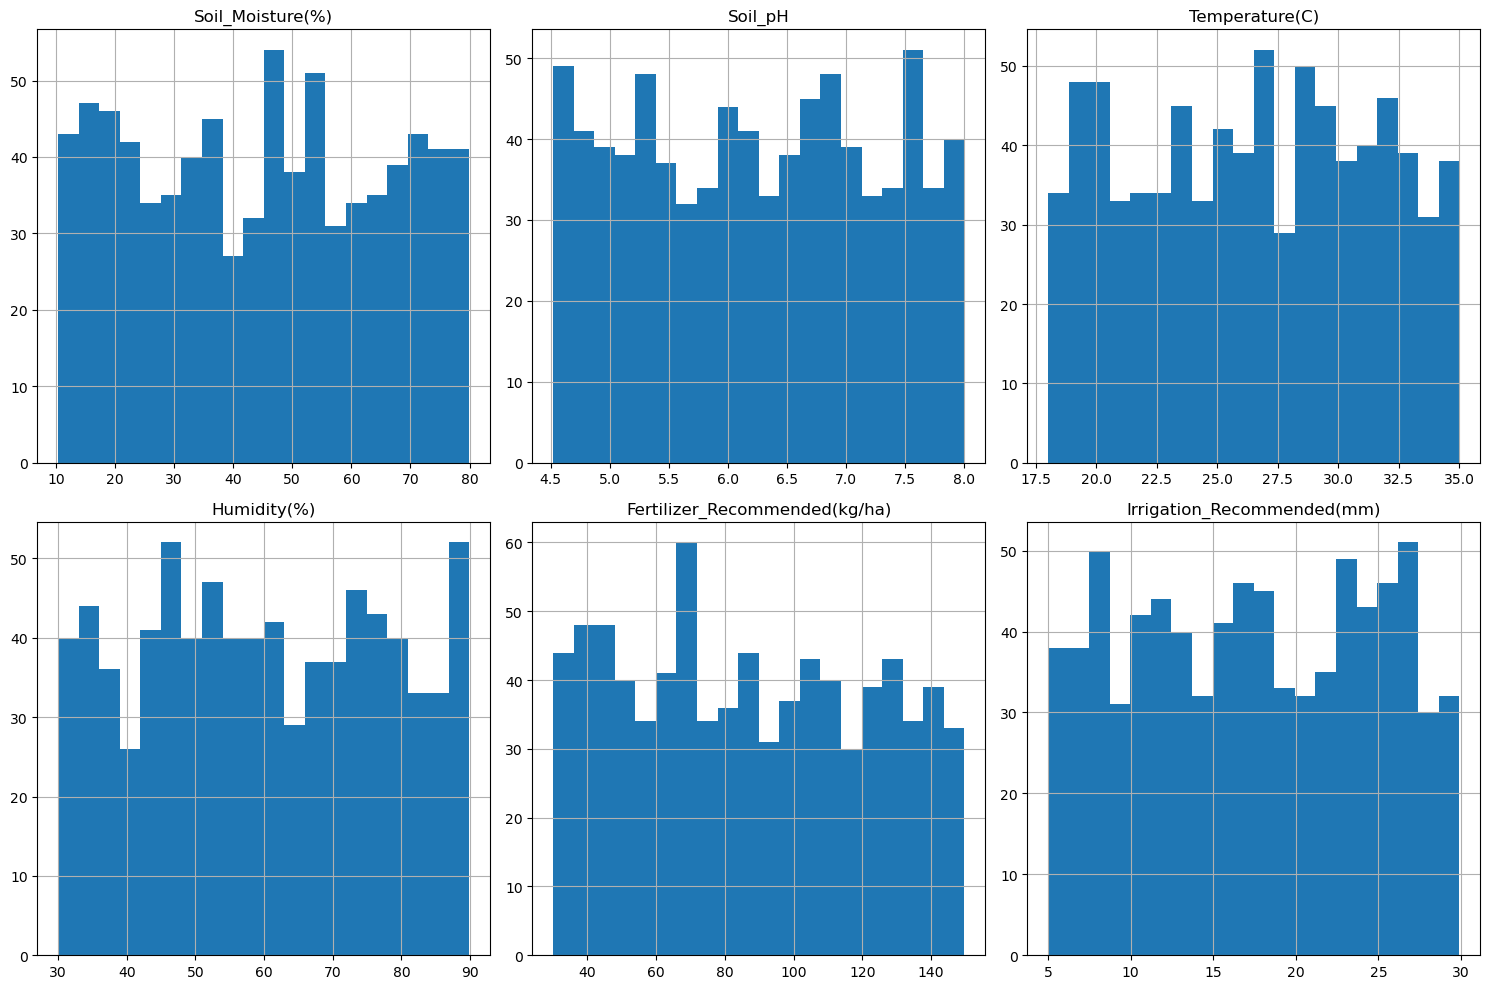

In [41]:
# Visualize the distribution of numeric variables using histograms
df[cols].hist(bins=20, figsize=(15, 10), layout=(2, 3))
plt.tight_layout()
plt.show()



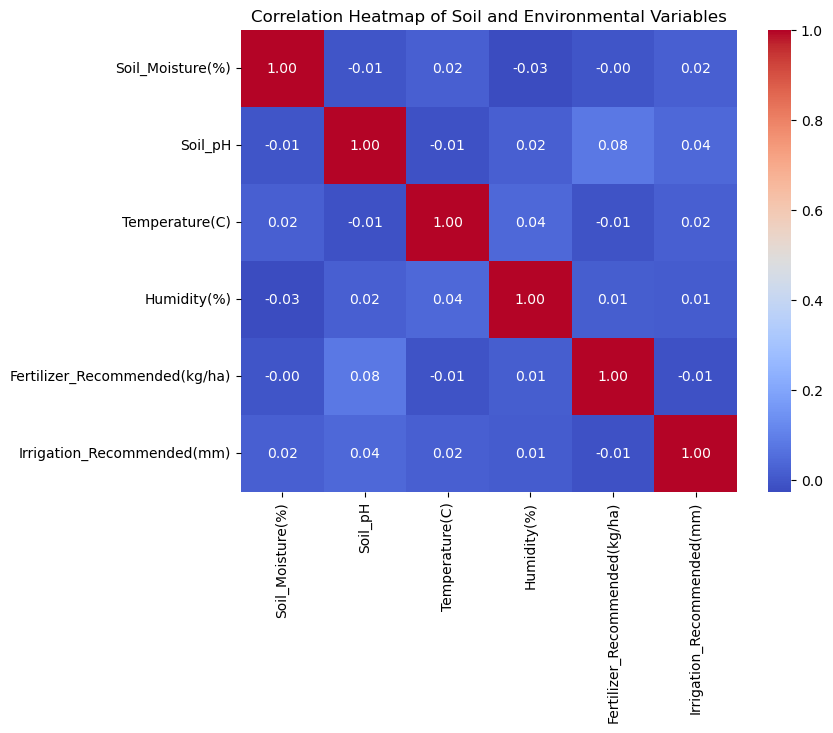

In [42]:
# Create a correlation heatmap for soil and environmental variables
corr = df[cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Soil and Environmental Variables')
plt.show()

In [43]:
# Calculate correlation of all variables with Fertilizer_Recommended(kg/ha)
fert_corr = corr['Fertilizer_Recommended(kg/ha)'].drop('Fertilizer_Recommended(kg/ha)').abs().sort_values(ascending=False)
print("Variables most influencing fertilizer recommendations (by absolute correlation):")
print(fert_corr)

Variables most influencing fertilizer recommendations (by absolute correlation):
Soil_pH                       0.080874
Humidity(%)                   0.013657
Irrigation_Recommended(mm)    0.012491
Temperature(C)                0.009705
Soil_Moisture(%)              0.003810
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [44]:
# Determine the crop type with the highest average soil moisture
avg_soil_moisture_by_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean()
highest_avg_crop = avg_soil_moisture_by_crop.idxmax()
highest_avg_value = avg_soil_moisture_by_crop.max()
print(f"Crop type with the highest average soil moisture: {highest_avg_crop} ({highest_avg_value:.2f}%)")

Crop type with the highest average soil moisture: Wheat (47.19%)


In [54]:
# Identify crops with average temperature above 30°C
avg_temp_by_crop = df.groupby('Crop_Type')['Temperature(C)'].mean()
hot_crops = avg_temp_by_crop[avg_temp_by_crop > 30].index.tolist()
avg_irrigation_by_crop = df.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()
overall_avg_irrigation = df['Irrigation_Recommended(mm)'].mean()

for crop in hot_crops:
    crop_avg_irrigation = avg_irrigation_by_crop[crop]
    print(f"Crop: {crop}")
    print(f"  Average Temperature: {avg_temp_by_crop[crop]:.2f}°C")
    print(f"  Average Irrigation: {crop_avg_irrigation:.2f} mm (Overall average: {overall_avg_irrigation:.2f} mm)")
    if crop_avg_irrigation < overall_avg_irrigation:
        print("  Suggestion: Consider increasing irrigation for this crop due to higher temperatures.\n")
    else:
        print("  Suggestion: Current irrigation appears adequate, but monitor soil moisture closely.\n")




In [47]:
# Export the cleaned dataset
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)

# Documenting insights and recommendations
print("Insights and Recommendations:")
print("- Wheat has the highest average soil moisture among the crop types.")
print("- No crops have an average temperature above 30°C, so no immediate irrigation adjustment is required for high-temperature crops.")
print("- Variables most influencing fertilizer recommendations (by absolute correlation):")
print(fert_corr)
print("- Data cleaning steps included removing duplicates, correcting erroneous values, and filling missing values with robust statistics.")
print("- The dataset is now ready for further modeling or operational use in precision agriculture.")

Insights and Recommendations:
- Wheat has the highest average soil moisture among the crop types.
- No crops have an average temperature above 30°C, so no immediate irrigation adjustment is required for high-temperature crops.
- Variables most influencing fertilizer recommendations (by absolute correlation):
Soil_pH                       0.080874
Humidity(%)                   0.013657
Irrigation_Recommended(mm)    0.012491
Temperature(C)                0.009705
Soil_Moisture(%)              0.003810
Name: Fertilizer_Recommended(kg/ha), dtype: float64
- Data cleaning steps included removing duplicates, correcting erroneous values, and filling missing values with robust statistics.
- The dataset is now ready for further modeling or operational use in precision agriculture.


In [52]:
# Find the highest average temperature among crop types after data cleaning
max_avg_temp = avg_temp_by_crop.max()
crop_with_max_temp = avg_temp_by_crop.idxmax()
print(f"The highest average temperature after data cleaning is {max_avg_temp:.2f}°C for crop type: {crop_with_max_temp}.")

The highest average temperature after data cleaning is 27.01°C for crop type: Maize.
